# Supplementary Figures - Upscaled CROP-seq KO150 screen volcano plots

In [4]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/ptraxler/projects/bmdm-stim/workflow/notebooks"

[1] "/home/ptraxler/projects/bmdm-stim"

In [6]:
# for volcano plots
library(EnhancedVolcano, quietly=TRUE)
library(patchwork, quietly=TRUE)

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [7]:
# default plotting theme
macro_theme <- function(){
    
    # settings
    font <- "Arial"
    size <- 6 # 8
    
    theme_bw(
        base_size=size,
        base_family = font
    ) %+replace% 
    
    theme(
      #grid elements
#       panel.grid.major = element_blank(),    #strip major gridlines
#       panel.grid.minor = element_blank(),    #strip minor gridlines
#       axis.ticks = element_blank(),          #strip axis ticks
      
#       strips axis lines ?
      
      #text elements
      plot.title = element_text(             #title
                   family = font,            #set font family
                   size = size,                #set font size
                   face = 'bold',            #bold typeface
                   hjust = 0.5,                #center align
                   vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
                   family = font,            #font family
                   size = size),               #font size
      
      plot.caption = element_text(           #caption
                   family = font,            #font family
                   size = size,                 #font size
                   hjust = 0.5),               #center align
      
      axis.title = element_text(             #axis titles
                   family = font,            #font family
                   size = size),               #font size
      
      axis.text = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size),                #font size
      
#       axis.text.x = element_text(            #margin for axis text
#                     margin=margin(5, b = 10))
    )
}

In [8]:
# extended ggsave
ggsave_new <- function(filename, results_path, plot, width=5, height=5){
    for (format in c('svg','png')){
        ggsave(
          paste0(filename,'.',format),
          plot = plot,
          device = format,
          path = file.path(results_path),
          scale = 1,
          dpi = 300,
            width = width,
            height = height,
          limitsize = FALSE,
        )
    }
}

In [9]:
# configs
data_path <- file.path('results','KO150')
results_path <- file.path('results','figures','supp_large_screen')

# general volcano proteins and genes
volcano_proteins <- c('CD115','CD11b','CD274','CD69','CD64','CD163','CD172a','CD14','CD80','Mac-2','CD95')
volcano_genes <- c('Csf1r','Itgam','Cd274','Cd69','Fcgr1','Cd163','Sirpa','Cd14','Cd80','Lgals3','Fas')

# Spi1 vs NT Volcano plot in untreated, 2h & 6h condition

In [10]:
# Spi1 volcano plot
spi1_volcano_proteins <- unlist(strsplit('CD115 | CD64 | Mac-2 | CD14', ' \\| '))
spi1_volcano_genes <- unlist(strsplit('Ptgds | Csf1r | Fcgr1 | Lgals3 | Cd14 | Cd74 | Cybb | Ly86 | Tyrobp | H2-Q6 | H2-K1 | Rpl24 | Id3 | Spp1 | Ctsl | H2-D1 | Akr1b3 | Lyz2', ' \\| '))

set.seed(42)

In [11]:
width <- 6
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [27]:
# config
# cond <- 'LO28_6h'
KO_gene <- 'Spi1'
spi1_volcano_panel <- list()

for (cond in c('untreated','LO28-6h','LO28-24h')){
    RNA <- read.csv(file=file.path(data_path, 'DEA_condition',paste0('KO150_DEA_RNA_',cond,'_',KO_gene,'.csv')), row.names=1)

    AB <- read.csv(file=file.path(data_path,'DEA_condition', paste0('KO150_DEA_AB_',cond,'_',KO_gene,'.csv')), row.names=1)

    res <- rbind(RNA, AB)

    keyvals.shape <- ifelse(rownames(res)%in%rownames(AB), 17, 20)
    names(keyvals.shape)[keyvals.shape == 17]<-"AB"
    names(keyvals.shape)[keyvals.shape == 20]<-"RNA"

    set.seed(42)

    spi1_volcano_p <- EnhancedVolcano(
        res,
        lab = rownames(res),
        selectLab = unique(c(spi1_volcano_genes, spi1_volcano_proteins, volcano_genes, volcano_proteins)),
#         boxedLabels = TRUE,
        # connector config start
        drawConnectors = TRUE,
        widthConnectors = 0.2,
        colConnectors = "grey10",
        max.overlaps = 0,
        maxoverlapsConnectors = Inf,
        min.segment.length = 0,
        directionConnectors = "both",
        arrowheads = FALSE,
        # connector config end
        x = 'avg_log2FC',
        y = 'p_val_adj',
        title = 'Spi1 KO vs WT',
        subtitle = cond,
        xlab=expression('log'[2]*'(fold change)'),
        ylab=expression('-log'[10]*'(adj. P-value)'),
        axisLabSize = 6, # 12
        xlim = c(-2.25,2.25),
        ylim = c(0,42),
        titleLabSize = 6, # 14
        subtitleLabSize = 0,
#         captionLabSize = 6, # 8
#         legendLabels=c('NS','avg.log2FC','adj.p-value', 'both'),
        pCutoff = 0.05,
        FCcutoff = 0.5,
        pointSize = 1, # 2
        labSize = 2.1, # 3
        colAlpha = 0.5,
        shapeCustom = keyvals.shape,
        legendPosition = 'none', #top, right, left, none # right
#         caption = bquote("cutoffs avg." ~log[2]~ "fold change > 0.5; adj.p-value < 0.05"),
    ) + macro_theme() + 
    theme(legend.position="none")

#     print(spi1_volcano_p)
    
    spi1_volcano_panel[[cond]] <- spi1_volcano_p
}

In [25]:
width <- 6 # 6
height <- 2.5 # 5
options(repr.plot.width=width, repr.plot.height=height)

spi1_volcano_panel_p <- wrap_plots(spi1_volcano_panel, guides='collect', ncol=3)

In [26]:
# save plot
set.seed(42)
ggsave_new(filename=paste0("spi1_volcano_panel"),
           results_path=results_path,
           plot=spi1_volcano_panel_p,
           width=width,
           height=height
          )

# Csf1r vs NT Volcano plot in untreated, 2h & 6h condition

In [12]:
width <- 6
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [28]:
# config
# cond <- 'LO28_6h'
KO_gene <- 'Csf1r'

for (cond in c('untreated', 'LO28-6h','LO28-24h')){
    RNA <- read.csv(file=file.path(data_path, 'DEA_condition',paste0('KO150_DEA_RNA_',cond,'_',KO_gene,'.csv')), row.names=1)

    AB <- read.csv(file=file.path(data_path,'DEA_condition', paste0('KO150_DEA_AB_',cond,'_',KO_gene,'.csv')), row.names=1)

    res <- rbind(RNA, AB)

    keyvals.shape <- ifelse(rownames(res)%in%rownames(AB), 17, 20)
    names(keyvals.shape)[keyvals.shape == 17]<-"AB"
    names(keyvals.shape)[keyvals.shape == 20]<-"RNA"

    set.seed(42)

    spi1_volcano_p <- EnhancedVolcano(
        res,
        lab = rownames(res),
        selectLab = unique(c(spi1_volcano_genes, spi1_volcano_proteins, volcano_genes, volcano_proteins)),
#         boxedLabels = TRUE,
        # connector config start
        drawConnectors = TRUE,
        widthConnectors = 0.2,
        colConnectors = "grey10",
        max.overlaps = 0,
        maxoverlapsConnectors = Inf,
        min.segment.length = 0,
        directionConnectors = "both",
        arrowheads = FALSE,
        # connector config end
        x = 'avg_log2FC',
        y = 'p_val_adj',
        title = 'Csf1r KO vs WT',
        subtitle = cond,
        xlab=expression('log'[2]*'(fold change)'),
        ylab=expression('-log'[10]*'(adj. P-value)'),
        axisLabSize = 6, # 12
        xlim = c(-2.25,2.25),
        ylim = c(0,42),
        titleLabSize = 6, # 14
        subtitleLabSize = 0,
#         captionLabSize = 6, # 8
#         legendLabels=c('NS','avg.log2FC','adj.p-value', 'both'),
        pCutoff = 0.05,
        FCcutoff = 0.5,
        pointSize = 1, # 2
        labSize = 2.1, # 3
        colAlpha = 0.5,
        shapeCustom = keyvals.shape,
        legendPosition = 'none', #top, right, left, none # right
#         caption = bquote("cutoffs avg." ~log[2]~ "fold change > 0.5; adj.p-value < 0.05"),
        ) + macro_theme() + 
        theme(legend.position="none")

#      print(spi1_volcano_p)
    
    spi1_volcano_panel[[cond]] <- spi1_volcano_p

}

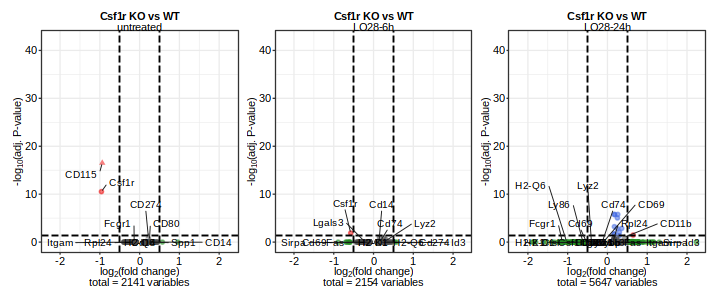

In [29]:
width <- 6 # 6
height <- 2.5 # 5
options(repr.plot.width=width, repr.plot.height=height)

spi1_volcano_panel_p <- wrap_plots(spi1_volcano_panel, guides='collect', ncol=3)
spi1_volcano_panel_p

In [30]:
# save plot
set.seed(42)
ggsave_new(filename=paste0("csf1r_volcano_panel"),
           results_path=results_path,
           plot=spi1_volcano_panel_p,
           width=width,
           height=height
          )

# Fcgr1 vs NT Volcano plot in untreated, 2h & 6h condition

In [16]:
width <- 6
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [31]:
# config
# cond <- 'LO28_6h'
KO_gene <- 'Fcgr1'

for (cond in c('untreated', 'LO28-6h','LO28-24h')){
    RNA <- read.csv(file=file.path(data_path, 'DEA_condition',paste0('KO150_DEA_RNA_',cond,'_',KO_gene,'.csv')), row.names=1)

    AB <- read.csv(file=file.path(data_path,'DEA_condition', paste0('KO150_DEA_AB_',cond,'_',KO_gene,'.csv')), row.names=1)

    res <- rbind(RNA, AB)

    keyvals.shape <- ifelse(rownames(res)%in%rownames(AB), 17, 20)
    names(keyvals.shape)[keyvals.shape == 17]<-"AB"
    names(keyvals.shape)[keyvals.shape == 20]<-"RNA"

    set.seed(42)

    spi1_volcano_p <- EnhancedVolcano(
        res,
        lab = rownames(res),
        selectLab = unique(c(spi1_volcano_genes, spi1_volcano_proteins, volcano_genes, volcano_proteins)),
#         boxedLabels = TRUE,
        # connector config start
        drawConnectors = TRUE,
        widthConnectors = 0.2,
        colConnectors = "grey10",
        max.overlaps = 0,
        maxoverlapsConnectors = Inf,
        min.segment.length = 0,
        directionConnectors = "both",
        arrowheads = FALSE,
        # connector config end
        x = 'avg_log2FC',
        y = 'p_val_adj',
        title = 'Fcgr1 KO vs Non-Targeting',
        subtitle = cond,
        xlab=expression('log'[2]*'(fold change)'),
        ylab=expression('-log'[10]*'(adj. P-value)'),
        axisLabSize = 6, # 12
        xlim = c(-2.25,2.25),
        ylim = c(0,42),
        titleLabSize = 6, # 14
        subtitleLabSize = 0,
#         captionLabSize = 6, # 8
#         legendLabels=c('NS','avg.log2FC','adj.p-value', 'both'),
        pCutoff = 0.05,
        FCcutoff = 0.5,
        pointSize = 1, # 2
        labSize = 2.1, # 3
        colAlpha = 0.5,
        shapeCustom = keyvals.shape,
        legendPosition = 'none', #top, right, left, none # right
#         caption = bquote("cutoffs avg." ~log[2]~ "fold change > 0.5; adj.p-value < 0.05"),
        ) + macro_theme() + 
        theme(legend.position="none")

#     print(spi1_volcano_p)
    
    spi1_volcano_panel[[cond]] <- spi1_volcano_p

}

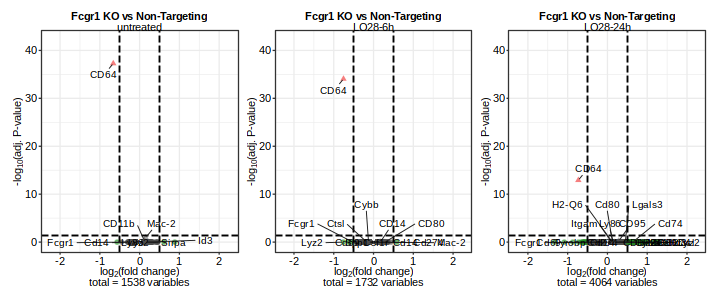

In [32]:
width <- 6 # 6
height <- 2.5 # 5
options(repr.plot.width=width, repr.plot.height=height)

spi1_volcano_panel_p <- wrap_plots(spi1_volcano_panel, guides='collect', ncol=3)
spi1_volcano_panel_p

In [33]:
# save plot
set.seed(42)
ggsave_new(filename=paste0("fcgr1_volcano_panel"),
           results_path=results_path,
           plot=spi1_volcano_panel_p,
           width=width,
           height=height
          )

# Volcano plots for interesting edges ie KO pairs (negative example)

In [20]:
# config
data_path <- file.path('results','KO150', 'KO_classifier', 'all', 'interpretation')
top_n <- 250

pairs <- list(
    list('KO_1'='LO28-6h+Ep400','KO_2'='LO28-6h+Brd2', 'mode'='stat')
)

In [21]:
# determine overlap (separate for up and down)
cond <- 'LO28-6h'

# load DEA results
res1 <- read.csv(file=file.path('results','KO150', 'DEA_condition_mixscape',paste0('KO150_DEA_RNA_',cond,'_Ep400','.csv')), row.names=1)
res2 <- read.csv(file=file.path('results','KO150', 'DEA_condition_mixscape',paste0('KO150_DEA_RNA_',cond,'_Brd2','.csv')), row.names=1)

overlaps <- union(
    intersect(rownames(res1)[(res1$p_val_adj<0.05)&(res1$avg_log2FC<0)], rownames(res2)[(res2$p_val_adj<0.05)&(res2$avg_log2FC<0)]),
    intersect(rownames(res1)[(res1$p_val_adj<0.05)&(res1$avg_log2FC>0)], rownames(res2)[(res2$p_val_adj<0.05)&(res2$avg_log2FC>0)])
)

length(overlaps)

[1] 1

In [22]:
width <- 7
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

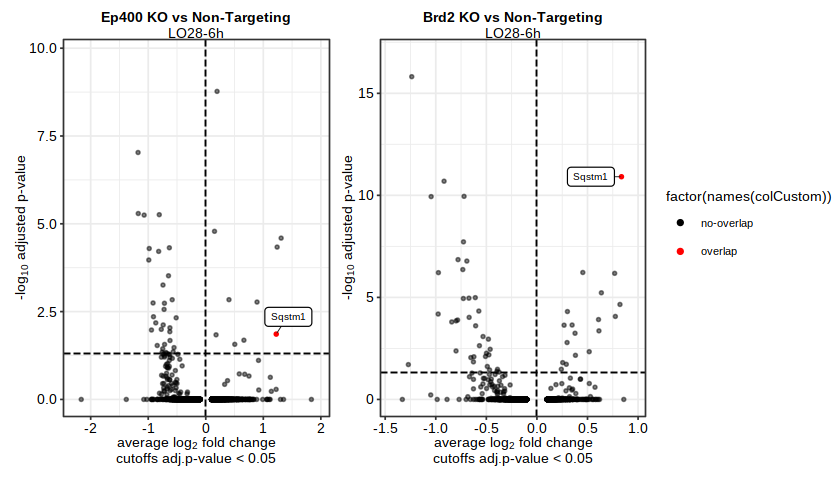

In [23]:
for (pair in pairs) {
    
    volcano_all <- list()

    for (KO_n in c('KO_1','KO_2')){

        cond <- strsplit(pair[[KO_n]],'\\+')[[1]][1]
        KO_gene <- strsplit(pair[[KO_n]],'\\+')[[1]][2]

        # load DEA results
        res <- read.csv(file=file.path('results','KO150', 'DEA_condition_mixscape',paste0('KO150_DEA_RNA_',cond,'_',KO_gene,'.csv')), row.names=1)

        keyvals.alpha <- ifelse(rownames(res)%in%overlaps, 1, 0.5)
        names(keyvals.alpha)[keyvals.alpha == 1]<-"overlap"
        names(keyvals.alpha)[keyvals.alpha == 0.1]<-"no-overlap"

        keyvals.colour <- ifelse(rownames(res)%in%overlaps, 'red', 'black')
        names(keyvals.colour)[keyvals.colour == 'red']<-"overlap"
        names(keyvals.colour)[keyvals.colour == 'black']<-"no-overlap"

        labels <- rownames(res)
        labels[!(labels%in%overlaps)] <- ''

        tmp_volcano <- EnhancedVolcano(
            res,
            lab = rownames(res),#labels,
            selectLab = overlaps,
            boxedLabels = TRUE,
            # connector config start
            drawConnectors = TRUE,
            widthConnectors = 0.2,
            colConnectors = "grey10",
            max.overlaps = 0,
            maxoverlapsConnectors = 20,
            min.segment.length = 0,
            directionConnectors = "both",
            arrowheads = FALSE,
            # connector config end
            x = 'avg_log2FC',
            y = 'p_val_adj',
            title = paste0(KO_gene,' KO vs Non-Targeting'),
            subtitle = paste0(cond),
            xlab=expression('average log'[2]*' fold change'),
            ylab=expression('-log'[10]*' adjusted p-value'),
            xlim = c(min(res[['avg_log2FC']], na.rm = TRUE) - 0.1, max(res[['avg_log2FC']], na.rm = TRUE) + 0.1),
            ylim = c(0, max(-log10(res[['p_val_adj']]), na.rm = TRUE) + 1),
            axisLabSize = 8,
            titleLabSize = 8,
            subtitleLabSize = 8,
            captionLabSize = 8,
            pointSize = 0.5,
            labSize = 2.0,
            legendLabels=c('NS','avg.log2FC','adj.p-value', 'both'),
            pCutoff = 0.05,
            FCcutoff = 0,
            colCustom = keyvals.colour,
            colAlpha = keyvals.alpha,#0.5,
        #     shapeCustom = keyvals.shape,
            legendPosition = 'right', #top, right, left, none
            caption = bquote("cutoffs adj.p-value < 0.05"),
            legendLabSize = 8,
            legendIconSize = 1,
        ) + macro_theme()

    #     print(tmp_volcano)

        if (length(volcano_all)==0){
            volcano_all[[KO_n]] <- tmp_volcano+guides(shape = "none", color="none")
        }else{
            volcano_all[[KO_n]] <- tmp_volcano
        }
    }

    volcano_all_p <- wrap_plots(volcano_all, ncol = 2)
    print(volcano_all_p)

    # save volcano plot
    set.seed(42)
    ggsave_new(filename=paste0(pair[['KO_1']],"-",pair[['KO_2']],"_",pair[['mode']],"_volcano"),
           results_path=results_path,
           plot=volcano_all_p,
           width=width,
           height=height
          )
}